# TensorFlow Iris Data Set
This notebook contains solutions to the TensorFlow problem sheet. This problem sheet uses the famous iris data set. This data set contains data regarding three related species, or classes, of Iris flowers. There are 50 samples per class making a total of 150 samples. Each sample consists of five variables, they are the sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and and the class, in that order. The three classes are Iris Setosa, Iris Versicolour and Iris Virginica. The full desciption of the data set can be found here. This Jupyter notebook will involve building a model in TensorFlow to classify an Iris flower based on the sepal and petal length and width. Before starting, import any libraries that might be required.

In [1]:
# For loading the data set.
import csv

# Efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# Build a neural network to classify iris flowers.
import tensorflow as tf

# matplotlib is a plotting library. pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (16.0, 8.0)

### Load the data
The first step is to download the iris data set a file called iris.csv in the data folder and then load the data set.

In [2]:
iris = list(csv.reader(open('data/iris.csv')))
iris

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

Next, split this data set into inputs and outputs using NumPy. The inputs are the sepal length, sepal width, petal length and petal width which are the first four columns of data. The possible outputs are setosa, versicolor or virginica, which is the fifth column of data. The inputs are floats and the outputs are strings at this stage.

In [3]:
# Get values from the first four columns of the array.
inputs = np.array(iris)[:,:4].astype(np.float)

# Get values from the fifth column of the array.
outputs = np.array(iris)[:,4]

We do not want the outputs to be strings. Instead we want to categorise them using one-hot arrays so that they can be used by our model later. To achieve this we must first convert the different classes to corresponding integers. For example, setosa will become 0, versicolor will become 1 and virginica will become 2. We then convert these integers to one-hot arrays meaning setosa will be represented as [1, 0, 0], versicolor will be represented as [0, 1, 0] and virginica will be represented as [0, 0, 1].

In [4]:
# Convert the output strings to ints.
outputs_vals, outputs_ints = np.unique(outputs, return_inverse=True)

# Convert to one-hot array.
# Adapted from https://stackoverflow.com/questions/38592324/one-hot-encoding-using-numpy
targets = np.array(outputs_ints).reshape(-1)
outputs_one_hot = np.eye(3)[targets]
outputs_one_hot

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

### Split the data into training and testing
Now that the data is in the correct format, split both the input and output data sets into training and test subsets with 75 entries in each set. Before we do this however we must randomly separate the data. Otherwise all the setosa and half the versicolor classes will be in the training set and all the virginica and the other half of the versicolor classes will be in the testing set. We do this by generating an array of random indices between 0 and 149 and spliting that in half. Each array denotes the indices of the elements in the iris ata set to be used as training and test data.

In [5]:
# Get an array of random indices between 0 and 149.
indices = np.random.permutation(len(inputs))

# Split the array of random indices in half.
train_indices, test_indices = np.array_split(indices, 2)

# Use the two arrays to separate the iris data set into taining and testing data.
inputs_train, outputs_train = inputs[train_indices], outputs_one_hot[train_indices]
inputs_test, outputs_test = inputs[test_indices],  outputs_one_hot[test_indices]

### Use Tensorflow to create model
Use Tensorflow to create a model to predict the species of Iris from a flowers sepal width, sepal length, petal width, and petal length. The softmax regression technique is a common algorithm for solving classification problems in machine learning. It assigns the probabilities of an object being one of several different things. This techniques gives a list of values between 0 and 1 that add up to 1. The index in the list with the highest value indicates the category the model estimated the data to belong to.

In [6]:
# Adapted from https://www.tensorflow.org/get_started/mnist/beginners
# Create a placeholder node for the input data.
x = tf.placeholder(tf.float32, [None, 4])

# Create the weight and bias as variables so that their values can be adjusted by tensorflow.
# They are initialised as tensors full of zeros.
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

# Implement the model using softmax.
y = tf.nn.softmax(tf.matmul(x, W) + b)

Now that the model is ready, we can train it using the test data created earlier. However, before we do this, we must first declare two variables. The first defines the number of times the model should be trained. The second will determine the proportional change to the weights at each iteration. By changing these two variables we can adjust the accuracy of the model.

In [7]:
learning_rate = 0.06
training_epochs = 1000

Now, we will define a cost function. A cost function is necessary in order to quantify the accuracy of the model which is crucial when trining a model. The lower the cost the more accurate the model will be. The cross-entropy function is a common way to calculate the cost of a model in machine learning.

In [8]:
# The actual results from the test data.
y_ = tf.placeholder(tf.float32, [None, 3])

# Implement the cross-entropy function.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Minimize cross_entropy using the gradient descent algorithm with a learning rate of 0.5.
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

Create a TensorFlow session and train the model. We will also save the loss value at each iteration. This data will be plotted later.

In [9]:
# Create a tensorflow session in which the model will run and initialize the variables.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

loss_history = np.empty(shape=[1], dtype=float)

# Train the model multiple times.
for _ in range(training_epochs):
    sess.run(train_step, feed_dict={x: inputs_train, y_: outputs_train})
    
    # Save lost value.
    loss_history = np.append(loss_history, sess.run(cross_entropy, feed_dict={x: inputs_test, y_: outputs_test}))

Plot the loss history gathered above. This plot is useful when adjusting both the `training_epochs` and `learning_rate` variables mentioned earlier.

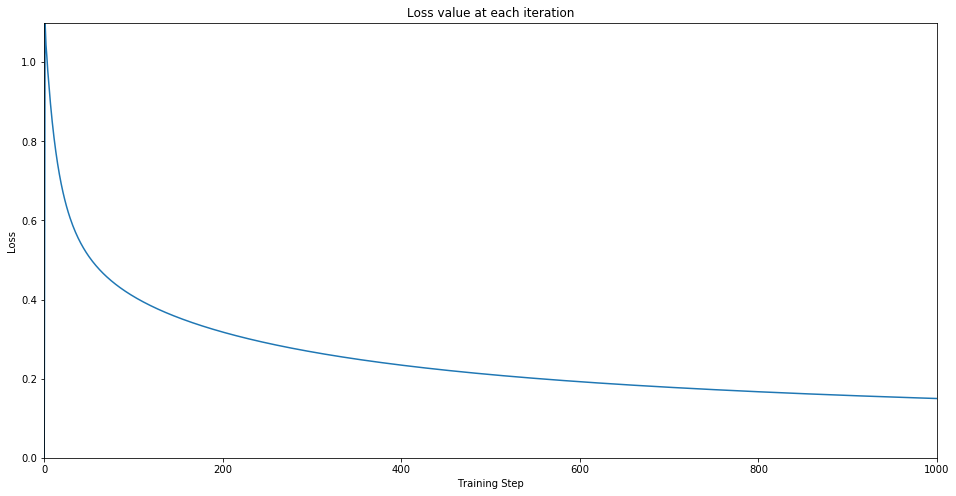

In [10]:
# Adapted from https://aqibsaeed.github.io/2016-07-07-TensorflowLR/
plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, training_epochs, 0, np.max(loss_history)])
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Loss value at each iteration')
plt.show()

### Test the model
Evaluate the model using the test data. Output the accuracy and loss.

In [11]:
# Get the index of the highest entry on both the tensors representing the estimated and actual species.
# Then check if they two indices are the same.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

# Determine the fraction that are correct.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Calculate and output the accuracy and loss for the test set.
print('Accuracy: %s' % (sess.run(accuracy, feed_dict={x: inputs_test, y_: outputs_test})))
print('Loss: %s' % (sess.run(cross_entropy, feed_dict={x: inputs_test, y_: outputs_test})))

Accuracy: 1.0
Loss: 0.149821
